<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/training/NLP_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:ZspmrdJA7vPoERsLNONcIRZV/ukm3jsqxAm3hBpJy1M root@ca7698c4e106
The key's randomart image is:
+---[RSA 4096]----+
|  +oo..          |
| o E o           |
|o.*.. .          |
|oBo++  . .       |
| o=Boo  S        |
|.  .B* *         |
|   o+o* +        |
|    =*.=.        |
|   .o==.oo       |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-3fa83667


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQC1wuqf4+DWiaDu1GYypdqhrv8ilPqdHvYGvPB+BpCy+YGOWu8EezJylrkbg4yyL9kGqkGKBIcH0QITzSSBYH7tuDGtV584bK9ZHuxeowJbkMFp5lgq06yVT47wGvcgOS7aOoX/eV3TbxC5RxKCNlvLjxYWFtyK26gGk83/gnBk9h/rHCqmNT28rbm5+3Q9HxzM4QQkdpU4/qBmI4dji8vyGNHGLY74z9hbyCh654nHcPuhK42GYTowmfOv9JP5ru/zGy6u28bO6GaHc7wMtgIi691LCiC76FulemTMfomAiW42zhNdi/abxouqYAXb1vu9OmoAU9AyayL0hlpEO1VhQ6WOfbSwQSAB2Jm+3Y3ZIhZvBxR1/tqXno3PBfTWnWN/W5w+wAGmeYYyU4ZOHDef9pr/Vv4ODe3dlR1kbSqVKMzXJDipkOsuS8HrOIAbfK3vkRaCkpRK23Y3mUmeOLXyDGOihbZ11mXToaoFfAyEJYCReyYxg8tSaq5Yu4Lr5++U52/GQLicYV06dmGcmJY4ZWiOvnm8eB+ZBksobFgtJdWAK5qFWrIdpYtNaekawGQAJ/5JWgfsg6mN3/kvmPNbLo6tHRbrFPTpkyJbunPJNiJOfA9RyvF0z5OqichAbU2asVmo7PnQGFRoCMMOjL7v0DH9OrKQaCcxwKea5kIMpw== root@ca7698c4e106


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 145 (delta 46), reused 58 (delta 16), pack-reused 0
Receiving objects: 100% (145/145), 96.56 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (46/46), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [1]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [2]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# install necessary libraries that might not be found
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_lg

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

2021-08-07 15:25:08.168152: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.1.1) =================
ℹ spaCy installation: /usr/local/lib/python3.7/dist-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_lg   >=3.1.0,<3.2.0   3.1.0   ✔

2021-08-07 15:25:18.126028: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 777.1 MB 16 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
************************
        Versions        
************************
Tensorflow version=2.5.0
Keras version=2.5.0
Sklearn version=0.22.2.post1
Numpy version=1.19.5
Pandas version=1.1.5
Seaborn version=0.11.1
Matplotlib version=3.2.2
SpaCy version=3.1.

### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [4]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [5]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,For over 80 years of experience in creating an...,NaN
1,23248790229909752,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9...,Yatai's main products cover various cleaning m...,NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing ...",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510784,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions...",NaN
5,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,Tongdun Technology is a professional third-par...,NaN
6,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing...",Holding company and also provides it_services....
7,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thail...,Sales of hydraulic equipment and parts,NaN
8,120313950904532608,EXCELKOS SDN. BHD.,MALAYSIA,NaN,IND,diversified,rubber,Manufacturer,https://www.excelkos.com/,"For Excelkos, it all started with a far-sighte...",NaN
9,125319506467804896,KUM ENG HUAT ELECTRIC CO PTE LTD,SINGAPORE,NaN,tmt,consumer electronics,consumer electronics_distributor,downstream,https://kumenghuat.com.sg/pages/about,Kum Eng Huat is the authorised dealer for Osra...,NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [6]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [7]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 9600
Total number of countries: 14
Total number of sectors: 16
Total number of subsectors: 37
Total number of valuechain: 18


In [8]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE          3459
MALAYSIA           2200
THAILAND           1817
CHINA               971
HONG KONG           577
INDONESIA           552
VIETNAM              12
MYANMAR               3
AUSTRALIA             2
LABUAN                2
TAIWAN                2
INDONESIANO CIF       1
UNITED KINGDOM        1
CANADA                1
Name: Country, dtype: int64

List of unique sector:
OOS           2082
CNI           1744
REH            942
IND            886
CG             862
ONG            667
TMT            637
cni            258
tmt            188
oos             79
ong             66
ind             11
cg               7
reh              6
auto & mec       1
                 1
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 1696
Downstream                1221
Midstream                  702
                           659
DOWNSTREAM                 658
midstream                  309
Manufacturer               296
UPSTREAM  

In [9]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               2161
building_material                     831
retail n distribution                 560
buildings & industrial                542
auto & mec                            482
petrochemical                         421
consumer electronics                  337
metals and mining                     300
residential                           281
cni_service providers                 279
restaurants, catering & services      270
fmcg                                  186
utilities                             178
it_services                           171
commercial                            146
o&g                                   135
mixed                                 129
o&g_service providers/contractors     123
semiconductor                         117
diversified                           114
infrastructure                        107
telecommunication                      88
hotels and accommodation               88
animal p

In [10]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                2161
building_material_manufacturer         573
buildings & industrial_contractor      496
consumer discretionary distributor     358
cni_service providers                  279
                                      ... 
gas and lng                              2
MIDSTREAM                                2
tisp – fiber cable                       2
metals and mining                        1
building material_manufacturer           1
Name: Archetype, Length: 94, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [11]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
...,...,...,...,...,...,...,...
9595,SOONBEE INVESTMENT HOLDINGS PTE. LT D,SINGAPORE,OOS,others,others,NaN,SOONBEE INVESTMENT HOLDINGS is an ACRA-registe...
9596,SICHUAN CHINA RAILWAY WENRUI REAL E,CHINA,NaN,NaN,NaN,NaN,NaN
9597,GROUP INDUSTRIES PTE LTD,SINGAPORE,CNI,building_material,building_material_manufacturer,MIDSTREAM,Group Industries Pte Ltd was founded in 1986. ...
9598,"SIAM NISSAN EASTERN CO.,LTD.",THAILAND,IND,auto & mec,auto dealer,Trader,Auto Dealership - Retail


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [12]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
12,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
28,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
48,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., ...",CHINA,NaN,NaN,NaN,NaN,NaN
63,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9576,REAL CHARM INVESTMENT LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
9585,JIJIN INTERNATIONAL TRADE (SHANGHAI),CHINA,NaN,NaN,NaN,NaN,NaN
9592,"QITAI TIANSHAN CEMENT CO., LTD",CHINA,NaN,NaN,NaN,NaN,NaN
9596,SICHUAN CHINA RAILWAY WENRUI REAL E,CHINA,NaN,NaN,NaN,NaN,NaN


In [13]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,Tongdun Technology is a professional third-par...
...,...,...,...,...,...,...,...
9593,BANGKOK PATANA SCHOOL,THAILAND,CG,retail n distribution,consumer discretionary distributor,Downstream,Bangkok Patana School is Thailand’s original B...
9594,INDRATI LINES PTE LTD,SINGAPORE,OOS,others,others,NaN,Indra is one of the leading global technology ...
9595,SOONBEE INVESTMENT HOLDINGS PTE. LT D,SINGAPORE,OOS,others,others,NaN,SOONBEE INVESTMENT HOLDINGS is an ACRA-registe...
9597,GROUP INDUSTRIES PTE LTD,SINGAPORE,CNI,building_material,building_material_manufacturer,MIDSTREAM,Group Industries Pte Ltd was founded in 1986. ...


In [14]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 8447


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

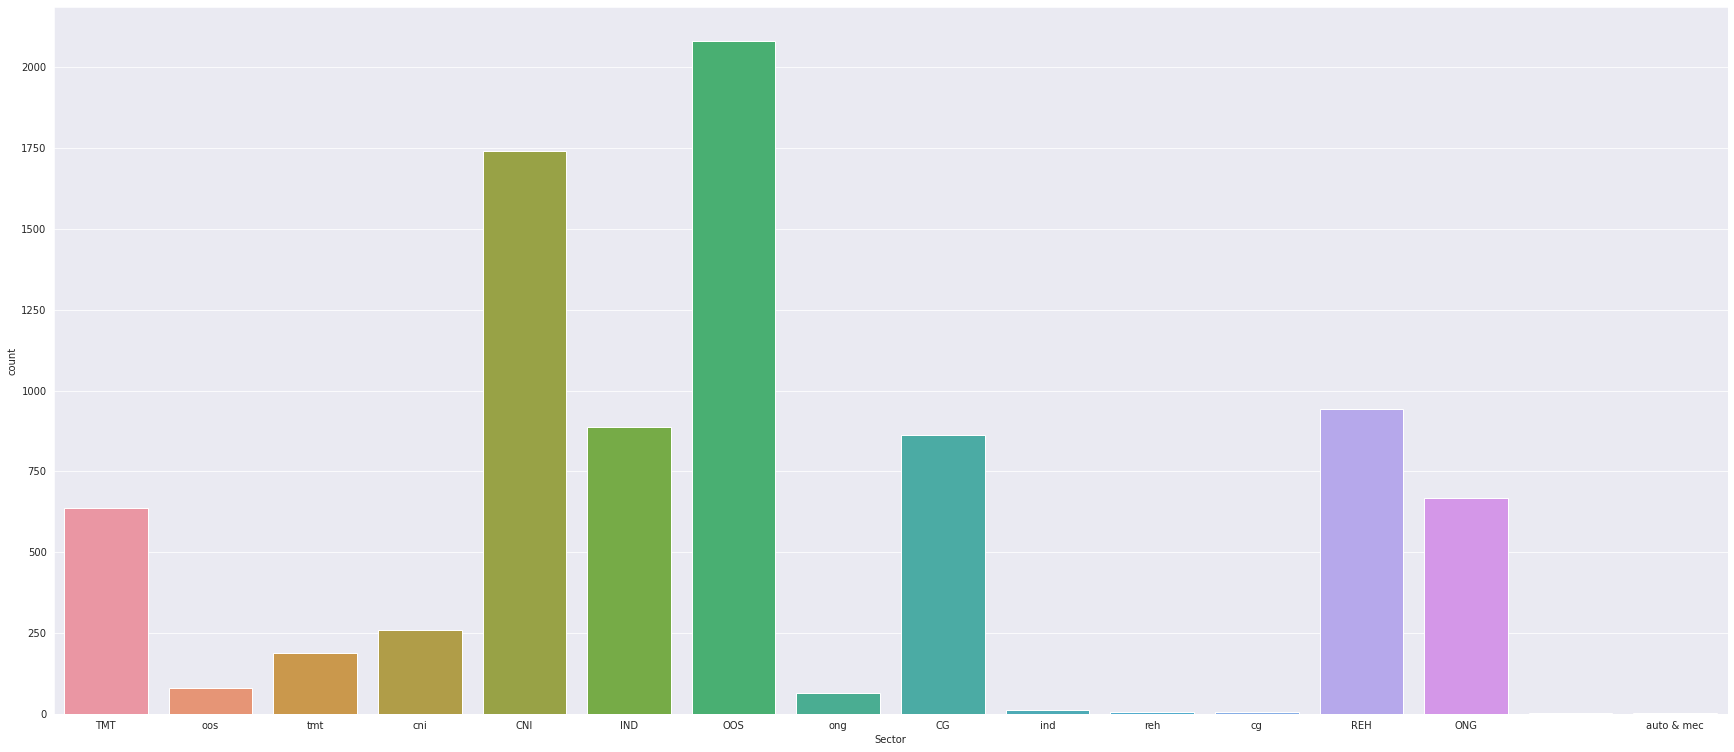

In [15]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

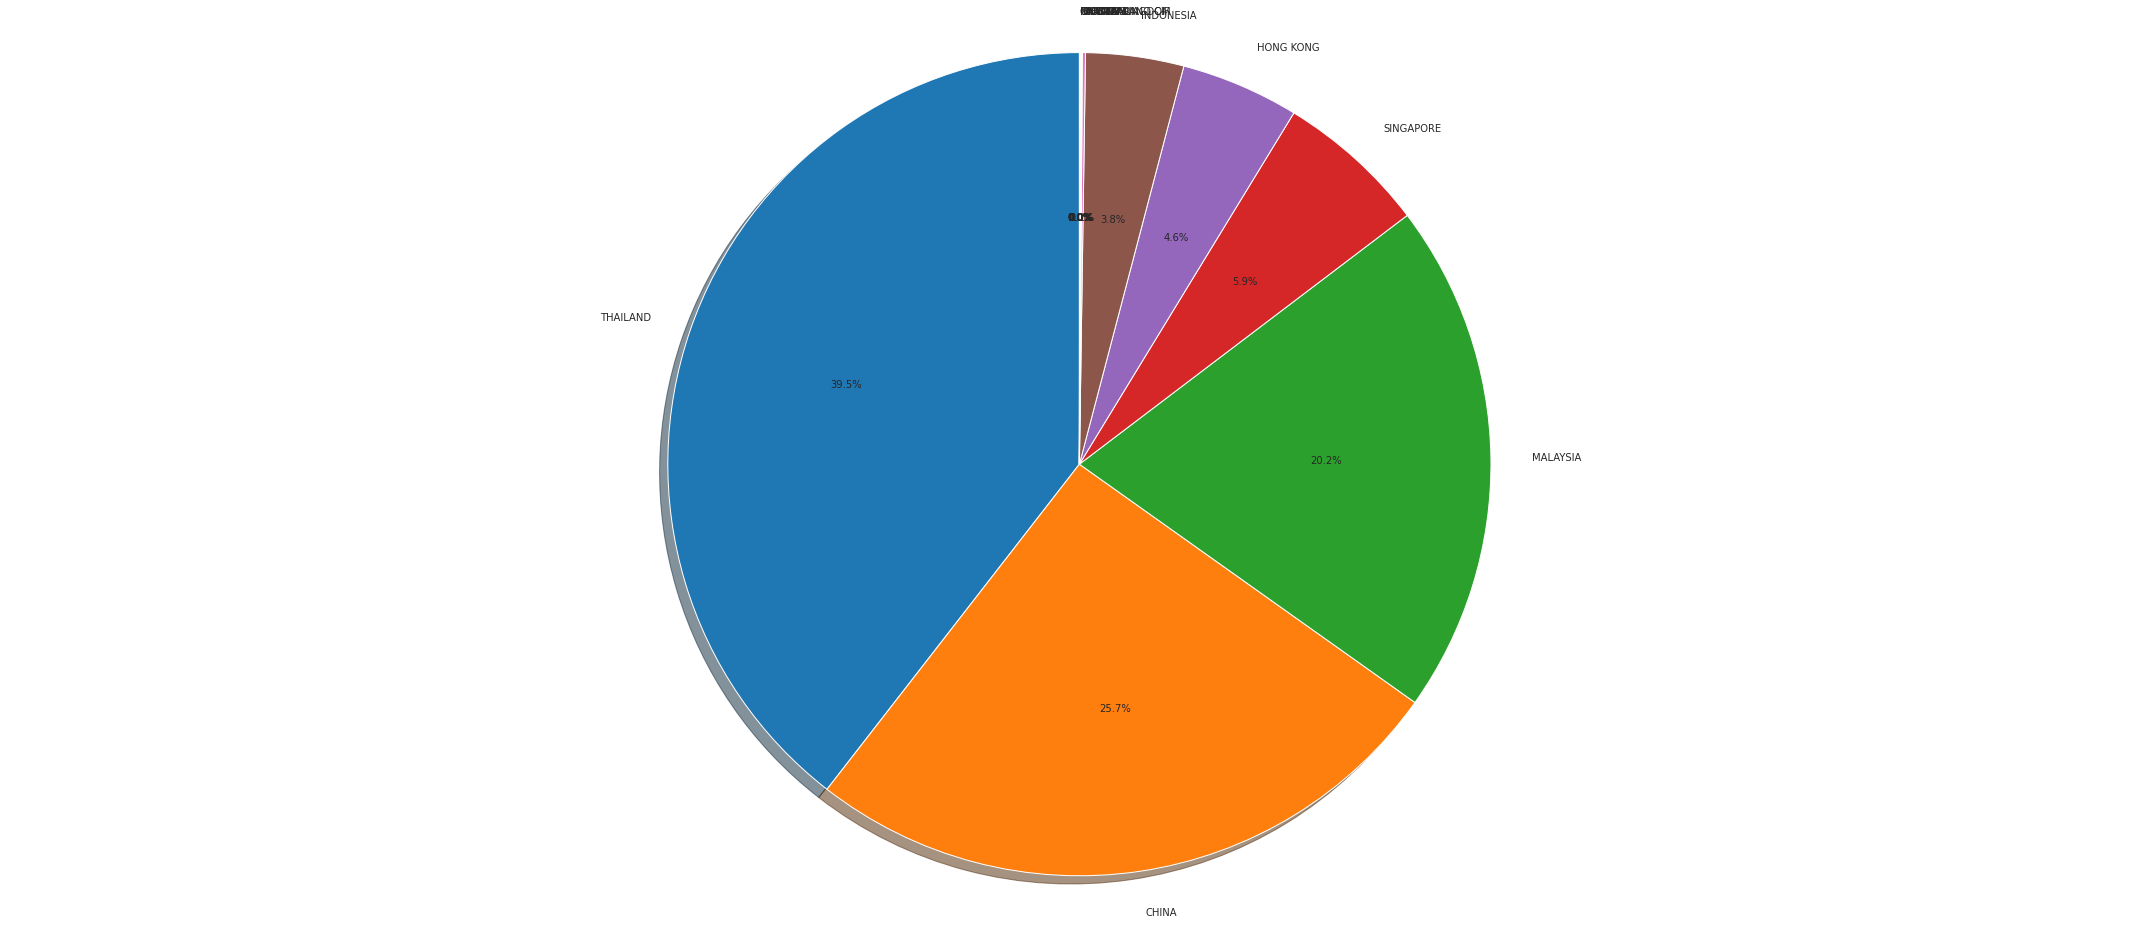

In [16]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [17]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                    Yatai's main products cover various cleaning machinery, cleaning agents, cl

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [18]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                     Yatai's main products cover various cleaning machinery, cleaning agents, c

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [19]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0


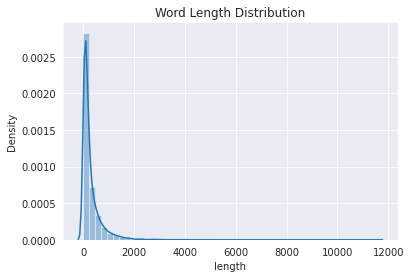

In [20]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [21]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 350

# now we will get the data from the restricted range of sample size
subsample = df_valid[:sample_size]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
...,...,...,...,...,...,...,...,...
369,KOIZUMI LIGHTING SINGAPORE PTE. LTD.,SINGAPORE,cni,building_material,building_material_manufacturer,midstream,"MANUFACTURE AND REPAIR OF ELECTRIC LAMPS AND LIGHTING EQUIPMENT (INCLUDING SILVER REFLECTORS, FITTINGS AND PARTS)",114.0
370,"LUMINTU INSAN MANDIRI,PT",INDONESIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,"PT. Lumintu Insan Mandiri , is a company that runs a business within the scope of Engineering and Construction for Civil and Mechanical Electrical including Procurement Services.",179.0
372,"COETERNITY CO.,LTD.",THAILAND,oos,others,others,NaN,"Production and distribution of sandpaper, equipment used in industrial plants",77.0
373,"UFCT TECHNOLOGY CO., LIMITED",HONG KONG,tmt,consumer electronics,consumer electronics_distributor,downstream,"UFCT is an authorized distributor of an electronic component product. Since the beginning of 2014, it has entered a clear position in the electronics distributor business. The main agent line is located in the internationally known resource type product line. The qualification of the strong product line determines the company's industry status. The company has the world famous chip brand MTK and SK SKHynix, one of the three global industrial storage providers, as well as the Korean brand FCI agent qualification, Taiwan brand Lepower agent qualification. Both MTK and SK helix are the leading global IC ind

### 4.4. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [22]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593
...,...,...,...,...,...,...,...,...
9593,BANGKOK PATANA SCHOOL,THAILAND,CG,retail n distribution,consumer discretionary distributor,Downstream,"Bangkok Patana School is Thailand’s original British international school for students from 2 to 18 years. Our not-for-profit school has remained at the forefront of education in Thailand and is today one of the most respected educational establishments in South East Asia. We provide learning from Foundation Stage right through to Senior Studies, for over 2,200 students from around 60 countries. The School follows a modified English National curriculum up to Year 11 and the International Baccalaureate in Years 12 and 13. Bangkok Patana School is committed to nurturing lifelong learners who can adapt to an ever-changing world. Our goal is to give your children the best intellectual, physical and social preparation for their futures.",741
9594,INDRATI LINES PTE LTD,SINGAPORE,OOS,others,others,,"Indra is one of the leading global technology and consulting companies and the technological partner for core business operations of its customers world-wide. It is a world-leader in providing proprietary solutions in specific segments in Transport and Defense markets, and a leading firm in Digital Transformation Consultancy and Information Technologies in Spain and Latin America through its affiliate Minsait Its business model is based on a comprehensive range of proprietary products, with a high-v

### 4.5. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [23]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


In [24]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

(8423, 9)

### 4.6. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [25]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [26]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []

    # filter through each token and add to preprocessed text if requirements #
    # met.                                                                   #
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.upper())

    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess>

In [27]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

In [28]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEAN, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATE, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER, ELECTRONIC, TELECOMMUNICATION, HEALTHTECH, LEAD, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]"
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,TMT,it_services,it_services,MIDSTREAM,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593,"[6, 17, 46, 5]","[TONGDUN, TECHNOLOGY, PROFESSIONAL, THIRD-PARTY, INTELLIGENT, RISK, MANAGEMENT, DECISION-MAKING, SERVICE, PROVIDER, HEADQUARTER, HANGZHOU, ZHEJIANG, INTEGRATE, ARTIFICIAL, INTELLIGENCE, BUSINESS, SCENARIO, TONGDUN, TECHNOLOGY, OFFER, SOLUTION

### 4.7. Bag of Words / TF-IDF

In [29]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1481


In [30]:
# do bag of words
bow_vectors = []
for index, row in df_valid.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1

    # append to dataframe
    bow_vectors.append(list(dictionary.values()))

    # print(f'{sum(dictionary.values()):>3}/{len(dictionary.values()):<3} |', dictionary.values())

df_valid['BoW_vectors'] = bow_vectors

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,BoW_vectors
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEAN, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATE, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER, ELECTRONIC, TELECOMMUNICATION, HEALTHTECH, LEAD, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]","[0,

In [31]:
# clean up BoW data 
temp = 0
for index, row in df_valid.iterrows():
    if sum(row['BoW_vectors']) < 1:
        df_valid.drop(index, inplace=True)

df_valid.shape

(6501, 11)

In [32]:
# import validation dataset
df_test = pd.read_excel('./val_dataset.xlsx')
df_test.replace('NAN', np.NaN, inplace=True)

# drop unnecessary columns
df_test.drop(rows_to_drop, axis=1, inplace=True)

# replace newline characters in validation data
df_test = df_test = df_test.replace('\n', ' ', regex=True)

# fill in NAN values in validation data
df_test.fillna(' ', inplace=True)

# change dtype of validation data columns
for i in columns_to_convert:
    df_valid[i] = df_valid[i].astype(str)
    
# process validation dataset
df_test['Valuechain'] = df_test['Valuechain'].str.split().str.join(' ')
df_test['Valuechain'] = df_test['Valuechain'].str.upper()
df_test['Sector'] = df_test['Sector'].str.upper()
df_test['Valuechain'].replace('', ' ', inplace=True)

# add tags to validation data
taglist_df = []
# process tags for records
for index, row in df_test.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except Exception as e:
        # drop data if not valid
        print(row.name, e, '\n')
        df_test.drop(index, inplace=True)

df_test['list_tag'] = taglist_df

# run spacy on validation data
evaluate_doc = list(nlp.pipe(df_test['Company Profile Information']))

# add spacy processed words and vectors to validation dataframe
df_test['processed'] = [doc._.processed for doc in evaluate_doc]
df_test['tok2vec_vectors'] = [doc.vector for doc in evaluate_doc]

# do bow processing
bow_vectors = []
for index, row in df_test.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1

    # append to dataframe
    bow_vectors.append(list(dictionary.values()))

df_test['BoW_vectors'] = bow_vectors

# clean up BoW data 
temp = 0
for index, row in df_test.iterrows():
    if sum(row['BoW_vectors']) < 1:
        df_test.drop(index, inplace=True)

df_test.head(3)

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,list_tag,processed,tok2vec_vectors,BoW_vectors
0,"BANGKOK ROLLER CO., LTD.",THAILAND,OOS,others,others,,"Bangkok Roller Co., Ltd. is the leading manufacturer and supplier of supplier rolls in Thailand. For over 20 years, we have been trusted by local and overseas customer. Our Rubber roll products have been major role in many manufacturing industries such as paper, steel sheets, textiles, plastic, films, printing, packaging product, and many more. Furthermore, our reputable rubber roll products have been parted in reducing the import of high priced rubber rolls from overseas.","[4, 24, 64, 0]","[BANGKOK, ROLLER, CO., LTD., LEAD, MANUFACTURER, SUPPLIER, SUPPLIER, ROLL, THAILAND, YEAR, TRUST, LOCAL, OVERSEAS, CUSTOMER, RUBBER, ROLL, PRODUCT, MAJOR, ROLE, MANUFACTURING, INDUSTRY, PAPER, STEEL, SHEET, TEXTILE, PLASTIC, FILM, PRINTING, PACKAGING, PRODUCT, FURTHERMORE, REPUTABLE, RUBBER, ROLL, PRODUCT, PART, REDUCE, IMPORT, HIGH, PRICE, RUBBER, ROLL, OVERSEAS]","[-0.056447383, 0.21101695, -0.031103438, -0.17660287, 0.16936646, 0.029999636, -0.02729656, -0.11956256, -0.13651244, 1.8386289, -0.15647945, 0.029125435, 0.11581242, -0.1224828, -0.075444, -0.093223214, 0.06679476, 1.3783227, -0.15340182, 0.13426617, -0.05553677, 0.0733473, -0.05833775, 0.046665534, -0.011252216, 0.015606452, -0.10524113, -0.03883239, 0.012557545, -0.07256938, 0.104613096, 0.06876958, -0.11247012, 0.08075604, 0.10944588, -0.05372884, 0.014704669, -0.009136189, 0.08763046, -0.036022905, 0.03523675, 0.07158786, 0.049226988, -0.13759813, -0.08809008, 0.019306742, -0.09959378, -0.0792771, 0.12232084, -0.004915998, 0.07396954, -0.029459797, -0.03244562, -0.025194354, -0.022714354, -0.052229084, 0.035303228, -0.118275955, 0.015565012, -0.10310424, 0.008569539, -0.14869425, -0.024494044, 0.18901749, 0.079915404, -0.035579078, 0.06129637, 0.14250755, -0.016735168, 0.077657625, -0.02607618, 0.06608145, 0.077682376, 0.039997973, 0.091477185, 0.07980899, 0.0704945, 0.020879705, 0.081921235, 0.10234961, 0.039634015, 0.1061775, -0.11746443, -0.089563645, -0.027652077, -0.30871576, -0.046182428, 0.40071592, 0.19297376, 0.11824047, 0.010926973, -0.054769695, -0.017911289, 0.04894328, 0.12306946, -0.0728587, 0.07885992, -0.069001995, -0.11834788, -0.042323086, ...]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,MJETS LIMITED,THAILAND,OOS,others,others,,"MJets currently operates the first and only FBO & Private Jet Terminal in Thailand offering 7 distinct business lines. These include: aircraft charter, aircraft management, consultancy, maintenance & AOG services, air ambulance, ground handling services and FBO facilities with VIP lounge. The highest of safety standards, world-class service and a personal touch are the things about us that have allowed MJets to continue to lead private aviation in Thailand and South-East Asia.","[4, 24, 64, 0]","[MJETS, CURRENTLY, OPERATE, FBO, PRIVATE, JET, TERMINAL, THAILAND, OFFER, DISTINCT, BUSINESS, LINE, INCLUDE, AIRCRAFT, CHARTER, AIRCRAFT, MANAGEMENT, CONSULTANCY, MAINTENANCE, AOG, SERVICE, AIR, AMBULANCE, GROUND, HANDLING, SERVICE, FBO, FACILITY, VIP, LOUNGE, HIGH, SAFETY, STANDARD, WORLD-CLASS, SERVICE, PERSONAL, TOUCH, THING, ALLOW, MJETS, CONTINUE, LEAD, PRIVATE, AVIATION, THAILAND, SOUTH-EAST, ASIA]","[0.0809934, 0.14199032, 0.028656067, -0.08420108, 0.20223913, -0.027773317, 0.032055527, -0.07215808, -0.0042647133, 1.8860918, -0.19495092, -0.075085916, 0.06470871, 0.018912286, -0.11437266, -0.08431523, -0.09094049, 1.2504501, -0.16896108, -0.012921025, -0.027268585, 0.087456286, -0.102900065, -0.116656445, 0.09514114, 0.023276709, -0.06993913, -0.015264425, 0.09763413, 0.014724674, 0.05

# 5.Models
---
Here we will train the model that will help categorize each company.

### 5.1. Training Models

In [33]:
import keras

print('--- Version Checking ---')
print("Keras:", keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [34]:
# split datasets to train and test
# distribution = int(df_valid.shape[0] * 0.8)

# df_train = df_valid.iloc[:distribution]
# df_test = df_valid.iloc[distribution:]

# df_train.fillna(0, inplace=True)
# df_test.fillna(0, inplace=True)

# ---
# X_train = np.array(list(df_valid['BoW_vectors']))
# y_train = np.array(list(df_valid['list_tag']))

# X_test = np.array(list(df_test['BoW_vectors']))
# y_test = np.array(list(df_test['list_tag']))

from keras.preprocessing import sequence

X_train = sequence.pad_sequences(np.array(list(df_valid['BoW_vectors'])))
y_train = np.array(list(df_valid['list_tag']))

X_test = sequence.pad_sequences(np.array(list(df_test['BoW_vectors'])))
y_test = np.array(list(df_test['list_tag']))

print(f'Train data shape: {X_train.shape}\nTest data shape: {X_test.shape}')

Train data shape: (6501, 1481)
Test data shape: (1071, 1481)


In [35]:
# create model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

def create_model(name, input_dim, output_dim):
    model = Sequential(name=name)

    # hidden layers
    model.add(Dense(input_dim, kernel_initializer='normal', activation='relu', input_dim=input_dim))
    model.add(Dense(input_dim // 2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(input_dim // 4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(input_dim // 8, kernel_initializer='normal', activation='relu'))

    # output
    model.add(Dense(output_dim, activation='softmax'))

    model.summary()

    return model

# one hot 
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

In [36]:
sector_model = create_model('sector_model', len(keywords_masterlist), len(sector))
subsector_model = create_model('subsector_model', len(keywords_masterlist), len(subsector))
archetype_model = create_model('archetype_model', len(keywords_masterlist), len(archetype))
valuechain_model = create_model('valuechain_model', len(keywords_masterlist), len(valuechain))

models = [sector_model, subsector_model, archetype_model, valuechain_model]

Model: "sector_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1481)              2194842   
_________________________________________________________________
dense_1 (Dense)              (None, 740)               1096680   
_________________________________________________________________
dense_2 (Dense)              (None, 370)               274170    
_________________________________________________________________
dense_3 (Dense)              (None, 185)               68635     
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 1302      
Total params: 3,635,629
Trainable params: 3,635,629
Non-trainable params: 0
_________________________________________________________________
Model: "subsector_model"
_________________________________________________________________
Layer (type)       

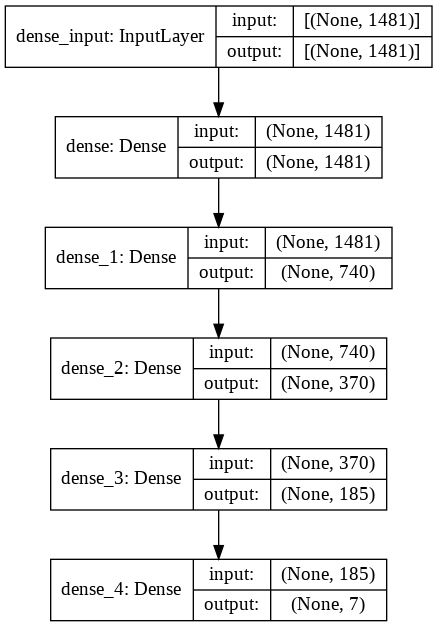

In [37]:
tf.keras.utils.plot_model(sector_model, "sector_model.png", show_shapes=True)

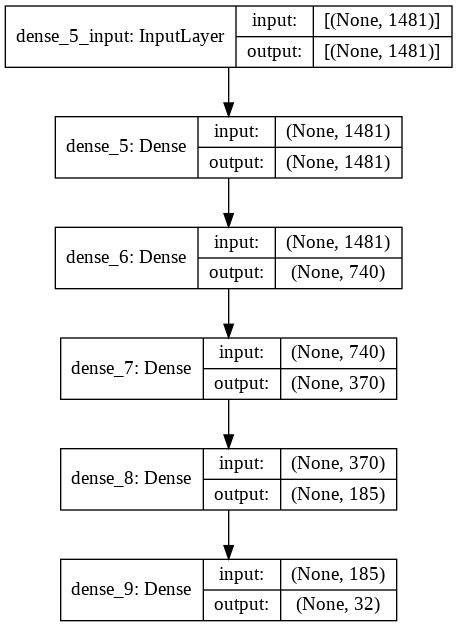

In [38]:
tf.keras.utils.plot_model(subsector_model, "subsector_model.png", show_shapes=True)

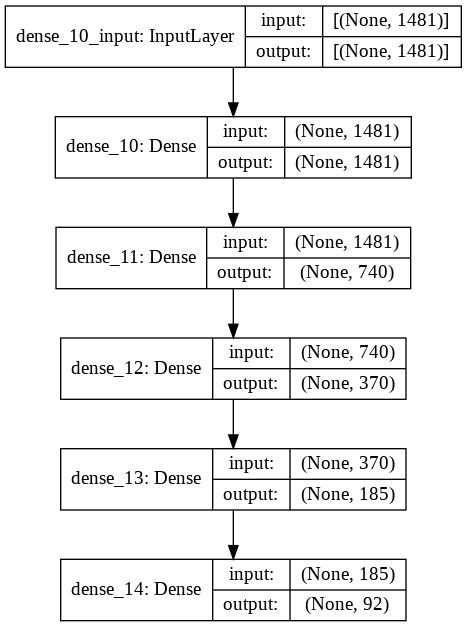

In [39]:
tf.keras.utils.plot_model(archetype_model, "archetype_model.png", show_shapes=True)

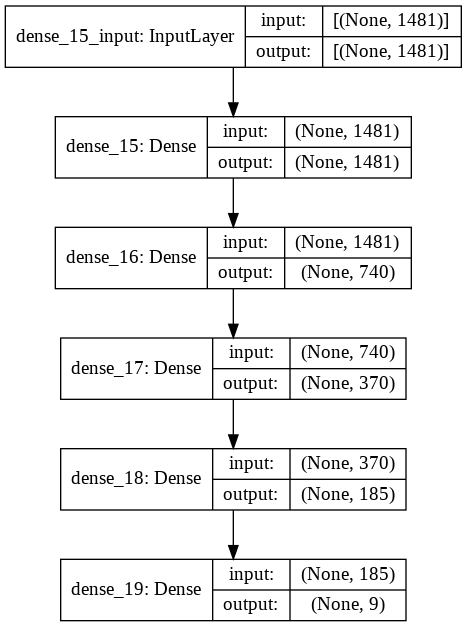

In [40]:
tf.keras.utils.plot_model(valuechain_model, "valuechain_model.png", show_shapes=True)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
from timeit import default_timer as timer

start = timer() 
for i in range(4):
    models[i].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(), AUC(name='auc_precision_recall')])
    models[i].fit(X_train, one_hot(y_train[:,i], tag_counts[i]), epochs=100, batch_size=20)
end = timer() 
print("Total time taken for execution: ", end-start, "s")

Epoch 1/100
326/326 [==============================] - 17s 5ms/step - loss: 1.2883 - accuracy: 0.5961 - precision: 0.7139 - recall: 0.2554 - auc_precision_recall: 0.8084
Epoch 2/100
326/326 [==============================] - 2s 5ms/step - loss: 0.7945 - accuracy: 0.7428 - precision: 0.7875 - recall: 0.5189 - auc_precision_recall: 0.9074
Epoch 3/100
326/326 [==============================] - 2s 5ms/step - loss: 0.7013 - accuracy: 0.7757 - precision: 0.7978 - recall: 0.5937 - auc_precision_recall: 0.9263
Epoch 4/100
326/326 [==============================] - 2s 5ms/step - loss: 0.6536 - accuracy: 0.7844 - precision: 0.8038 - recall: 0.6318 - auc_precision_recall: 0.9363
Epoch 5/100
326/326 [==============================] - 2s 5ms/step - loss: 0.5697 - accuracy: 0.8093 - precision: 0.8088 - recall: 0.6587 - auc_precision_recall: 0.9436
Epoch 6/100
326/326 [==============================] - 2s 5ms/step - loss: 0.5595 - accuracy: 0.8170 - precision: 0.8138 - recall: 0.6786 - auc_precision_

### 5.2 Testing Models

In [ ]:
label_names = ['sector', 'subsector', 'archetype', 'valuechain']

print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall\tPR AUC')
for i, label in enumerate(label_names):
    loss, accuracy, precision, recall, auc_precision_recall = models[i].evaluate(X_test, one_hot(y_test[:,i], tag_counts[i]), verbose=0)
 
    print(f'{label:<16}{loss:<8.3}{accuracy:<16.3}{precision:<16.3}{recall:<8.3f}{auc_precision_recall:.3f}')
    

# metrics = models.evaluate(X_test, one_hot(y_test), verbose=0)[1:]

# label_names = ['sector', 'subsector', 'archetype', 'valuechain']

# for i in range(4):
#     # loss, accuracy, precision, recall, auc_precision_recall = models[i].evaluate(X_test, one_hot(y_test[:,i], tag_counts[i]), verbose=0)
#     metrics = models[i].evaluate(X_test, one_hot(y_test[:,i], tag_counts[i]), verbose=0)

# print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall\tPR AUC')
# for i, label in enumerate(label_names):
#     print(f'{label:<16}{loss[i]:<8.3f}{metrics[i+4]:<8.3%}\t{metrics[i+8]:<9.3f}\t{metrics[i+12]:<6.3f}\t{metrics[i+16]:<6.3f}')

Label		Loss	Accuracy	Precision	Recall	PR AUC
sector          1.11    0.853           0.887           0.844   0.986
subsector       1.54    0.788           0.859           0.740   0.991
archetype       1.94    0.703           0.834           0.665   0.991
valuechain      1.48    0.785           0.859           0.771   0.984


Label					Accuracy	Correct Rows	% Correct Rows	Precision	Recall
--------------------------------------------------------------------------------------------------------------
CG                                      58.0%           101             50.5%           0.847           0.823 
> agribusiness                          100.00%         9               4.5%            1.000           1.000 
> animal protein                        89.47%          17              8.5%            0.944           0.895 
> fmcg                                  89.19%          33              16.5%           0.673           0.892 
> retail n distribution                 55.26%          42              21.0%           0.840           0.553 
--------------------------------------------------------------------------------------------------------------
CNI                                     82.5%           145             72.5%           0.817           0.943 
> building_material                     88.64%  

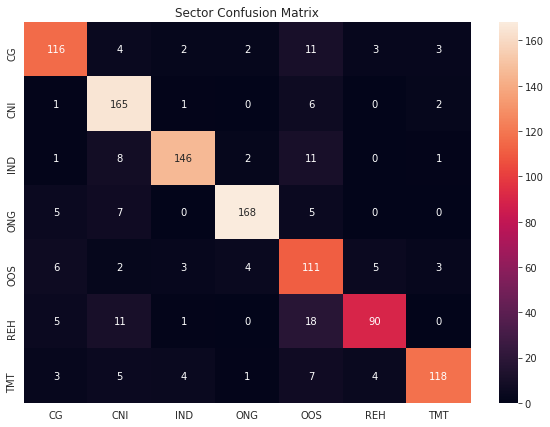

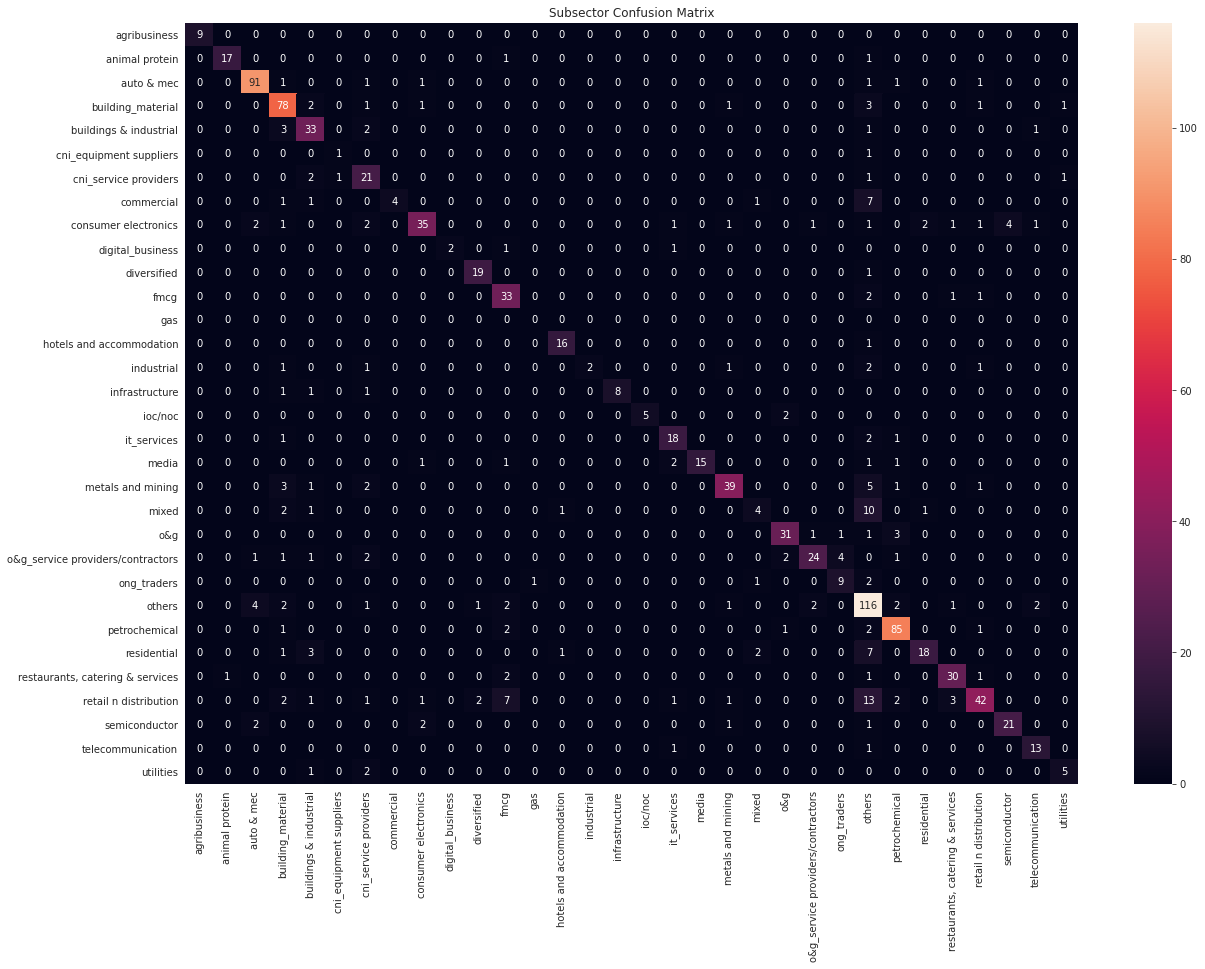

In [ ]:
# import libs
import seaborn as sns

# custom metric analysis
y_test_multi = [one_hot(np.array(list(df_test['list_tag']))[:, i], tag_counts[i]) for i in range(4)]
y_actual = np.array(df_test['list_tag'].to_list())

# obtain predictions
y_pred = []
for i in range(4):
    y_pred.append(models[i].predict(X_test))

# process predictions
processed = []
for label in y_pred:
    temp = []
    # turn all softmax preds to numbers
    for row in label:
        temp.append(np.argmax(row))
    
    processed.append(np.array(temp))

# convert processed preds to correct format
y_pred = np.array(processed).T

# do analysis
# format: [correctly predicted, sec and sub predicted correctly, false negative, false positive]
sector_metrics = {i : [0, 0, 0, 0] for i in range(tag_counts[0])}
subsector_metrics = {i : [0, 0, 0, 0] for i in range(tag_counts[1])}
for i, row in enumerate(y_pred):   
    flag = 0
    # check sector
    if row[0] == y_actual[i][0]:
        sector_metrics[row[0]][0] += 1
        flag += 1
    else:
        sector_metrics[row[0]][3] += 1
        sector_metrics[y_actual[i][0]][2] += 1
        
    # check subsector
    if row[1] == y_actual[i][1]:
        subsector_metrics[row[1]][0] += 1
        flag += 1
    else:
        subsector_metrics[row[1]][3] += 1
        subsector_metrics[y_actual[i][1]][2] += 1
        
    if flag == 2:
        sector_metrics[row[0]][1] += 1
        subsector_metrics[row[1]][1] += 1
        
# print out stats
print(f'Label\t\t\t\t\tAccuracy\tCorrect Rows\t% Correct Rows\tPrecision\tRecall')
for sec_label, sec_metrics in sector_metrics.items():
    # generate list of subsectors under a sector
    sub_unique, sub_counts = np.unique(y_actual[y_actual[:, 0] == sec_label][:, 1], return_counts=True)
    sec_subsector = dict(zip(sub_unique, sub_counts))
        
    # print sector stats
    print('-'*110)
    # check divide by zero error
    try:
        sec_acc = sec_metrics[0] / 200
        sec_corr = sec_metrics[1] / 200
        sec_pre = sec_metrics[0] / (sec_metrics[0] + sec_metrics[3])
        sec_rec = sec_metrics[0] / (sec_metrics[0] + sec_metrics[2])
    except ZeroDivisionError:
        sec_acc = sec_corr = sec_pre = sec_rec = 0

    print(f'{sector[sec_label]:<40.39}{sec_acc:<16.1%}{sec_metrics[1]:<16}{sec_corr:<16.1%}{sec_pre:<16.3f}{sec_rec:<6.3f}')   

    for sub_label, sub_count in sec_subsector.items():
        sub_metrics = subsector_metrics[sub_label]
        
        # catch divide-by-zero errors
        try:
            sub_acc = sub_metrics[0] / sub_count
            sub_corr = sub_metrics[1] / 200
            sub_pre = sub_metrics[0] / (sub_metrics[0] + sub_metrics[3])
            sub_rec = sub_metrics[0] / (sub_metrics[0] + sub_metrics[2])
        except ZeroDivisionError:
            sub_pre = sub_rec = sub_corr = sub_acc = 0
            
        
        print(f'> {subsector[sub_label]:<38.37}{sub_acc:<16.2%}{sub_metrics[1]:<16}{sub_corr:<16.1%}{sub_pre:<16.3f}{sub_rec:<6.3f}')
    
# sector confusion matrix
df_sector_cm = pd.DataFrame(tf.math.confusion_matrix(y_actual[:, 0], y_pred[:, 0]).numpy(), index=sector, columns=sector)

plt.figure(1, figsize=(10, 7))
plt.title('Sector Confusion Matrix')
sns.heatmap(df_sector_cm, annot=True, fmt='d')

# subsector confusion matrix
df_subsector_cm = pd.DataFrame(tf.math.confusion_matrix(y_actual[:, 1], y_pred[:, 1]).numpy(), index=subsector, columns=subsector)

plt.figure(2, figsize=(20, 14))
plt.title('Subsector Confusion Matrix')
sns.heatmap(df_subsector_cm, annot=True, fmt='d')

In [ ]:
results = sector_model.predict(X_test)
results = np.argmax(results, axis=1)

for i in range(len(results)):
    print(f'Expected: {y_test[i,0]} Got: {results[i]}')

Expected: 4 Got: 4
Expected: 4 Got: 1
Expected: 5 Got: 5
Expected: 1 Got: 1
Expected: 0 Got: 3
Expected: 6 Got: 1
Expected: 6 Got: 6
Expected: 4 Got: 4
Expected: 0 Got: 0
Expected: 3 Got: 3
Expected: 2 Got: 2
Expected: 5 Got: 5
Expected: 0 Got: 0
Expected: 6 Got: 6
Expected: 0 Got: 0
Expected: 1 Got: 4
Expected: 3 Got: 3
Expected: 3 Got: 3
Expected: 3 Got: 3
Expected: 6 Got: 6
Expected: 3 Got: 3
Expected: 3 Got: 3
Expected: 4 Got: 4
Expected: 1 Got: 1
Expected: 0 Got: 0
Expected: 4 Got: 4
Expected: 1 Got: 1
Expected: 2 Got: 2
Expected: 5 Got: 5
Expected: 6 Got: 6
Expected: 3 Got: 1
Expected: 1 Got: 1
Expected: 5 Got: 1
Expected: 0 Got: 0
Expected: 0 Got: 6
Expected: 6 Got: 6
Expected: 0 Got: 0
Expected: 4 Got: 4
Expected: 0 Got: 0
Expected: 1 Got: 1
Expected: 0 Got: 0
Expected: 6 Got: 6
Expected: 1 Got: 1
Expected: 4 Got: 4
Expected: 1 Got: 1
Expected: 3 Got: 3
Expected: 2 Got: 2
Expected: 0 Got: 0
Expected: 2 Got: 2
Expected: 4 Got: 4
Expected: 6 Got: 6
Expected: 3 Got: 3
Expected: 1 

In [ ]:
results
# y_test
# df_valid['list_tag']

array([4, 1, 5, ..., 5, 4, 1])

### 5.3. Saving Models

In [ ]:
# save models to file
for i in range(4):
    models[i].save(f'./model_{i+1}')

INFO:tensorflow:Assets written to: ./model_1/assets
INFO:tensorflow:Assets written to: ./model_2/assets
INFO:tensorflow:Assets written to: ./model_3/assets
INFO:tensorflow:Assets written to: ./model_4/assets


In [ ]:
!zip -r model_1.zip ./model_1
!zip -r model_2.zip ./model_2
!zip -r model_3.zip ./model_3
!zip -r model_4.zip ./model_4

  adding: model_1/ (stored 0%)
  adding: model_1/variables/ (stored 0%)
  adding: model_1/variables/variables.data-00000-of-00001 (deflated 42%)
  adding: model_1/variables/variables.index (deflated 65%)
  adding: model_1/saved_model.pb (deflated 89%)
  adding: model_1/assets/ (stored 0%)
  adding: model_2/ (stored 0%)
  adding: model_2/variables/ (stored 0%)
  adding: model_2/variables/variables.data-00000-of-00001 (deflated 41%)
  adding: model_2/variables/variables.index (deflated 65%)
  adding: model_2/saved_model.pb (deflated 89%)
  adding: model_2/assets/ (stored 0%)
  adding: model_3/ (stored 0%)
  adding: model_3/variables/ (stored 0%)
  adding: model_3/variables/variables.data-00000-of-00001 (deflated 40%)
  adding: model_3/variables/variables.index (deflated 65%)
  adding: model_3/saved_model.pb (deflated 89%)
  adding: model_3/assets/ (stored 0%)
  adding: model_4/ (stored 0%)
  adding: model_4/variables/ (stored 0%)
  adding: model_4/variables/variables.data-00000-of-00001 

---
---
---

# 6.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

